<a href="https://colab.research.google.com/github/Alirizahm/Campaign_AB_Testing/blob/main/Campaign_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Author : Aliriza Hamonangan Matondang**
*   **Email : riza.ali18@gmail.com**
*   **LinkedIn : https://www.linkedin.com/in/alirizahm/**

# Case

The Company has performed two types of Campaign, but they don't know which one is the best. The Company has decided to do A/B Testing to evaluate the best Campaign between two types of campaign.

The Company has done power analysis, the results of the analysis is 30 (30 days) sample data for control and test.

Hypotesis :

*   H0: There is not statistically significant difference between the control and test campaign
*   H1: There is statistically significant difference between the control and test campaign

p-value : 0.05

Assumsion :

Normality Assumsion
*   H0: The assumption of normal distribution is provided
*   H1: The assumption of normal distribution is not provided

If the p-value is less than 0.05, it is considered significant and a non-parametric test (mannwhitneyu test) will be used. Else a parametric test (t-test)

Assumsion :

Variance Homogeneity
*   H0: Variances are homogeneous
*   H1: Variances are not homogeneous

p-value : 0.05




# Import Package

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from statsmodels.stats.power import TTestPower, TTestIndPower, GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.nonparametric import rank_compare_2indep
import statsmodels.api as sm

import scipy.stats
from scipy import stats
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import levene, mannwhitneyu

# Power Analysis

In [ ]:
# initialize t-test power analysis object
analysis = TTestIndPower()

result = analysis.solve_power(
    0.65,
    power = 0.8,
    alternative = "larger",
    alpha = 0.05
)

In [ ]:
# Calculate sample size
print('Sample Size: %.3f' % result)

Sample Size: 29.967


#### Result

From this analysis, we can conclude that at a minimum we need 30 sampale size data in each group (control & experiment) to see a 0.65% change at minimum on conversion rate.

Note : this is only assumption for learning & practice

# Read the Dataset

In [ ]:
control = pd.read_csv('/content/gdrive/MyDrive/A_B_Testing/control_group.csv', sep = ";")
test = pd.read_csv('/content/gdrive/MyDrive/A_B_Testing/test_group.csv', sep = ";")

In [ ]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


# Data Preparation

## Renaming Certain Column

In [ ]:
control = control.rename(columns={"Campaign Name": "Campaign_Name"})
control = control.rename(columns={"Spend [USD]": "Spend_[USD]"})
control = control.rename(columns={"# of Impressions": "Impressions"})
control = control.rename(columns={"# of Website Clicks": "Website_Clicks"})
control = control.rename(columns={"# of Searches": "Searches"})
control = control.rename(columns={"# of View Content": "View_Content"})
control = control.rename(columns={"# of Add to Cart": "Add_to_Cart"})
control = control.rename(columns={"# of Purchase": "Purchase"})

test = test.rename(columns={"Campaign Name": "Campaign_Name"})
test = test.rename(columns={"Spend [USD]": "Spend_[USD]"})
test = test.rename(columns={"# of Impressions": "Impressions"})
test = test.rename(columns={"# of Website Clicks": "Website_Clicks"})
test = test.rename(columns={"# of Searches": "Searches"})
test = test.rename(columns={"# of View Content": "View_Content"})
test = test.rename(columns={"# of Add to Cart": "Add_to_Cart"})
test = test.rename(columns={"# of Purchase": "Purchase"})

In [ ]:
control.head()

,Campaign_Name,Date,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,Campaign_Name,Date,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


## Handling Missing Value

In [ ]:
control.isnull().sum()

Campaign_Name     0
Date              0
Spend_[USD]       0
Impressions       1
Reach             1
Website_Clicks    1
Searches          1
View_Content      1
Add_to_Cart       1
Purchase          1
dtype: int64

In [ ]:
test.isnull().sum()

Campaign_Name     0
Date              0
Spend_[USD]       0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchase          0
dtype: int64

In [ ]:
map = {}

na = control.isna().sum().reset_index()
na = na[na[0] > 0]

for col in na['index']:
    map[col] = control[col].mean()

control.fillna(map, inplace=True)

In [ ]:
control.isnull().sum()

Campaign_Name     0
Date              0
Spend_[USD]       0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchase          0
dtype: int64

## Change Data Type

In [ ]:
cat=[]
num=[]
for i in control.columns:
  if control[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Campaign_Name', 'Date']
num =  ['Spend_[USD]', 'Impressions', 'Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchase']


In [ ]:
for i in control[num]:
  if control[i].dtype == 'float64':
    control[i] = control[i].astype(int)

In [ ]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign_Name   30 non-null     object
 1   Date            30 non-null     object
 2   Spend_[USD]     30 non-null     int64 
 3   Impressions     30 non-null     int64 
 4   Reach           30 non-null     int64 
 5   Website_Clicks  30 non-null     int64 
 6   Searches        30 non-null     int64 
 7   View_Content    30 non-null     int64 
 8   Add_to_Cart     30 non-null     int64 
 9   Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


## Summary Data

In [ ]:
control.groupby('Campaign_Name')[num].sum().reset_index()

,Campaign_Name,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Control Campaign,68653,3286792,2665347,159623,66639,58313,39000,15683


In [ ]:
test.groupby('Campaign_Name')[num].sum().reset_index()

,Campaign_Name,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Test Campaign,76892,2237544,1604747,180970,72569,55740,26446,15637


## Feature Engineering

In [ ]:
control["CTR"] = (control["Website_Clicks"] / control["Impressions"]) * 100
test["CTR"] = (test["Website_Clicks"] / test["Impressions"]) * 100

control["Activity"] = control["Impressions"] + control["Website_Clicks"] + control["Searches"] + control["View_Content"] + control["Add_to_Cart"] + control["Purchase"]
test["Activity"] = test["Impressions"] + test["Website_Clicks"] + test["Searches"] + test["View_Content"] + test["Add_to_Cart"] + test["Purchase"]

control["CPA"] = (control["Spend_[USD]"] / control["Website_Clicks"]) / (control["Website_Clicks"] / control["Activity"])
test["CPA"] = (test["Spend_[USD]"] / test["Website_Clicks"]) / (test["Website_Clicks"] / test["Activity"])

control["Conversion_Rate"] = (control["Website_Clicks"] / control["Activity"]) * 100
test["Conversion_Rate"] = (test["Website_Clicks"] / test["Activity"]) * 100

In [ ]:
control.head()

,Campaign_Name,Date,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase,CTR,Activity,CPA,Conversion_Rate
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618,8.483471,96604,4.474565,7.262639
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511,6.700264,134754,3.599745,6.018374
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372,4.941121,143011,7.911278,4.550699
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340,4.205659,79490,16.415468,3.855831
4,Control Campaign,5.08.2019,1835,109559,88844,5320,2221,1943,1300,522,4.855831,120865,7.836342,4.401605


In [ ]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    30 non-null     object 
 1   Date             30 non-null     object 
 2   Spend_[USD]      30 non-null     int64  
 3   Impressions      30 non-null     int64  
 4   Reach            30 non-null     int64  
 5   Website_Clicks   30 non-null     int64  
 6   Searches         30 non-null     int64  
 7   View_Content     30 non-null     int64  
 8   Add_to_Cart      30 non-null     int64  
 9   Purchase         30 non-null     int64  
 10  CTR              30 non-null     float64
 11  Activity         30 non-null     int64  
 12  CPA              30 non-null     float64
 13  Conversion_Rate  30 non-null     float64
dtypes: float64(3), int64(9), object(2)
memory usage: 3.4+ KB


In [ ]:
test.head()

,Campaign_Name,Date,Spend_[USD],Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase,CTR,Activity,CPA,Conversion_Rate
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255,7.681416,46752,15.237106,6.498118
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677,4.623755,110839,12.991391,4.201590
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578,11.222123,84933,3.230756,9.283788
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340,5.374055,87226,13.298849,4.833421
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768,5.129708,124846,8.342493,4.696186


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    30 non-null     object 
 1   Date             30 non-null     object 
 2   Spend_[USD]      30 non-null     int64  
 3   Impressions      30 non-null     int64  
 4   Reach            30 non-null     int64  
 5   Website_Clicks   30 non-null     int64  
 6   Searches         30 non-null     int64  
 7   View_Content     30 non-null     int64  
 8   Add_to_Cart      30 non-null     int64  
 9   Purchase         30 non-null     int64  
 10  CTR              30 non-null     float64
 11  Activity         30 non-null     int64  
 12  CPA              30 non-null     float64
 13  Conversion_Rate  30 non-null     float64
dtypes: float64(3), int64(9), object(2)
memory usage: 3.4+ KB


In [ ]:
control_new = control[['Campaign_Name','Date','CTR','CPA','Conversion_Rate']]
test_new = test[['Campaign_Name','Date','CTR','CPA','Conversion_Rate']]

control_new_1 = control[['Campaign_Name','Date','CTR','Activity','CPA','Conversion_Rate']]
test_new_1 = test[['Campaign_Name','Date','CTR','Activity','CPA','Conversion_Rate']]

In [ ]:
control_new.head()

,Campaign_Name,Date,CTR,CPA,Conversion_Rate
0,Control Campaign,1.08.2019,8.483471,4.474565,7.262639
1,Control Campaign,2.08.2019,6.700264,3.599745,6.018374
2,Control Campaign,3.08.2019,4.941121,7.911278,4.550699
3,Control Campaign,4.08.2019,4.205659,16.415468,3.855831
4,Control Campaign,5.08.2019,4.855831,7.836342,4.401605


In [ ]:
control_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    30 non-null     object 
 1   Date             30 non-null     object 
 2   CTR              30 non-null     float64
 3   CPA              30 non-null     float64
 4   Conversion_Rate  30 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.3+ KB


In [ ]:
control_new.head()

,Campaign_Name,Date,CTR,CPA,Conversion_Rate
0,Control Campaign,1.08.2019,8.483471,4.474565,7.262639
1,Control Campaign,2.08.2019,6.700264,3.599745,6.018374
2,Control Campaign,3.08.2019,4.941121,7.911278,4.550699
3,Control Campaign,4.08.2019,4.205659,16.415468,3.855831
4,Control Campaign,5.08.2019,4.855831,7.836342,4.401605


In [ ]:
test_new.head()

,Campaign_Name,Date,CTR,CPA,Conversion_Rate
0,Test Campaign,1.08.2019,7.681416,15.237106,6.498118
1,Test Campaign,2.08.2019,4.623755,12.991391,4.201590
2,Test Campaign,3.08.2019,11.222123,3.230756,9.283788
3,Test Campaign,4.08.2019,5.374055,13.298849,4.833421
4,Test Campaign,5.08.2019,5.129708,8.342493,4.696186


# Normality Test & Variance Homogeneity

## Control

In [ ]:
cat=[]
num=[]
for i in control_new.columns:
  if control_new[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Campaign_Name', 'Date']
num =  ['CTR', 'CPA', 'Conversion_Rate']


In [ ]:
def dist_plot(df,test,cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,10))
  for i, col in enumerate(cols):
    ax = plt.subplot(2,4, i+1)
    sm.qqplot(df[col], ax=ax, line = 's')
    plt.text(0.3,0.85,"Shapiro p-value= " + str(round(shapiro(df[col]).pvalue,5)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.text(0.3,0.8,"Variance Homogeneity= " + str(round(stats.levene(df[col], test[col]).pvalue,5)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

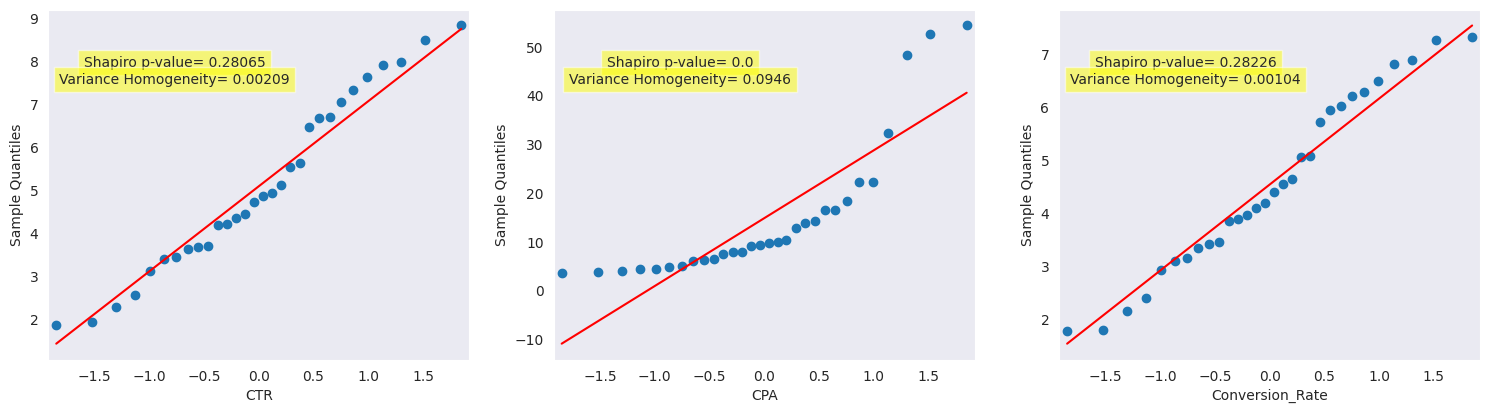

In [ ]:
dist_plot(control_new, test_new, num)

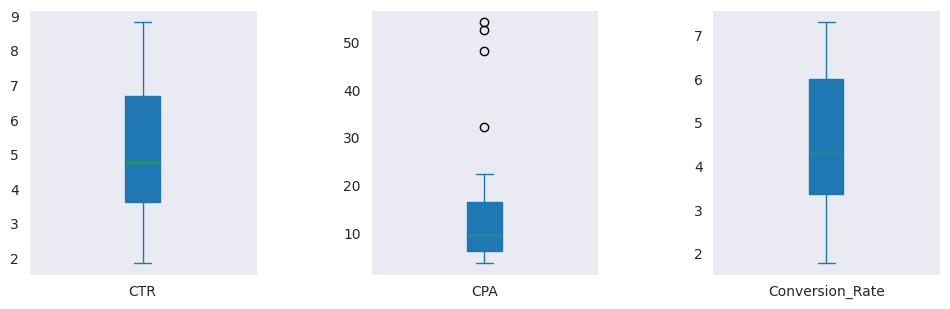

In [ ]:
sns.set_style('dark')
control_new[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [ ]:
for i in control_new.columns:
  if control_new[i].dtype != 'object':
    stat, p = shapiro(control_new[i])
    print('Statistics=%.5f, p=%.5f' % (stat, p))

Statistics=0.95833, p=0.28065
Statistics=0.72355, p=0.00000
Statistics=0.95843, p=0.28226


In [ ]:
for i in control_new.columns:
  if control_new[i].dtype != 'object':
    stat, p = stats.levene(control_new[i], test_new[i])
    print('Statistics=%.5f, p=%.5f' % (stat, p))

Statistics=10.38059, p=0.00209
Statistics=2.88796, p=0.09460
Statistics=11.92717, p=0.00104


## Test

In [ ]:
def dist_plot(df, control, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,10))
  for i, col in enumerate(cols):
    ax = plt.subplot(2,4, i+1)
    sm.qqplot(df[col], ax=ax, line = 's')
    plt.text(0.3,0.85,"Shapiro p-value= " + str(round(shapiro(df[col]).pvalue,5)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.text(0.3,0.8,"Variance Homogeneity= " + str(round(stats.levene(df[col], control[col]).pvalue,5)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

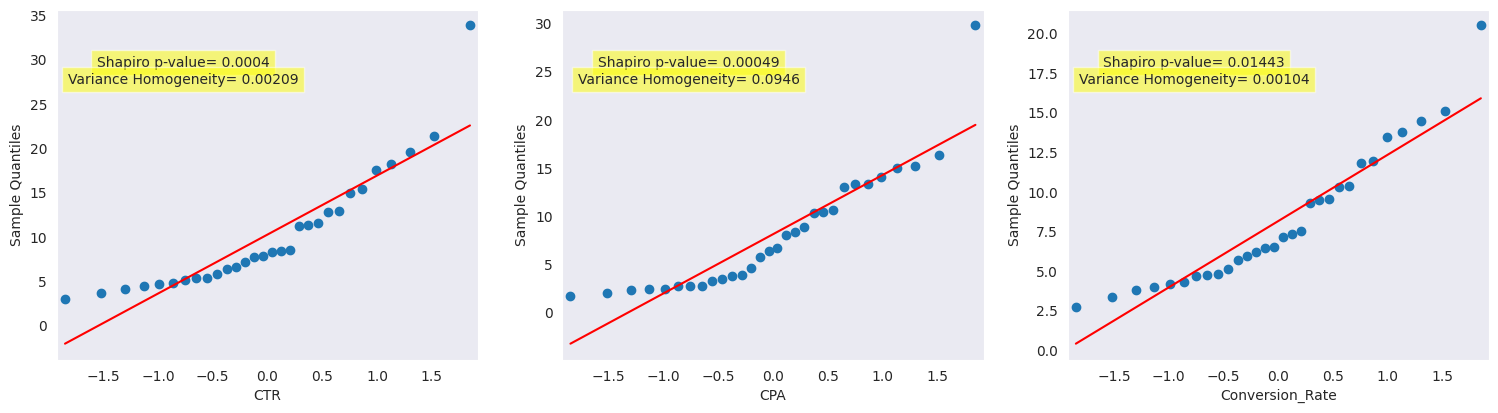

In [ ]:
dist_plot(test_new, control_new, num)

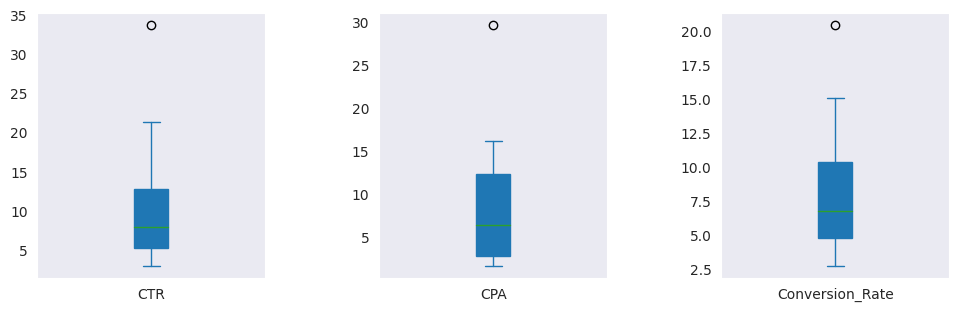

In [ ]:
sns.set_style('dark')
test_new[num].plot(subplots=True, layout=(5,6), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [ ]:
for i in test_new.columns:
  if test_new[i].dtype != 'object':
    stat, p = shapiro(test_new[i])
    print('Statistics=%.5f, p=%.5f' % (stat, p))

Statistics=0.84092, p=0.00040
Statistics=0.84522, p=0.00049
Statistics=0.90947, p=0.01443


# Conclusion



*  The features are not normal and homoheneous by normality and variance homogenity test
*  The p-value < 0.05, so assumption of normality is not provided.
*  we will use non-parametric test(mannwhitneyu test) for every features.







# Exploratory Data Analysis

In [ ]:
df = control_new_1.merge(test_new_1, how="outer").sort_values(["Date"])
df = df.reset_index(drop=True)
df.head()

,Campaign_Name,Date,CTR,Activity,CPA,Conversion_Rate
0,Control Campaign,1.08.2019,8.483471,96604,4.474565,7.262639
1,Test Campaign,1.08.2019,7.681416,46752,15.237106,6.498118
2,Test Campaign,10.08.2019,8.547773,107994,4.564120,7.523566
3,Control Campaign,10.08.2019,1.935829,126723,52.524968,1.796832
4,Test Campaign,11.08.2019,4.483876,94636,16.285804,3.962551


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    60 non-null     object 
 1   Date             60 non-null     object 
 2   CTR              60 non-null     float64
 3   Activity         60 non-null     int64  
 4   CPA              60 non-null     float64
 5   Conversion_Rate  60 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
df.isnull().sum()

Campaign_Name      0
Date               0
CTR                0
Activity           0
CPA                0
Conversion_Rate    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    60 non-null     object 
 1   Date             60 non-null     object 
 2   CTR              60 non-null     float64
 3   Activity         60 non-null     int64  
 4   CPA              60 non-null     float64
 5   Conversion_Rate  60 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


<Axes: xlabel='Campaign_Name', ylabel='count'>

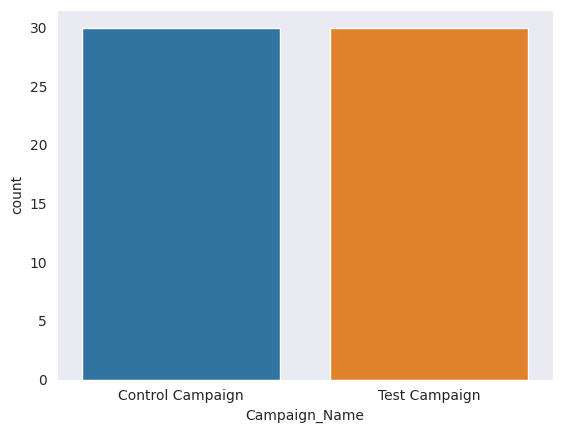

In [ ]:
sns.countplot(x = 'Campaign_Name', data = df)

In [ ]:
# The total sample of Control and Test are 30

In [ ]:
viz = df.groupby(['Campaign_Name']).sum().reset_index()
viz

<ipython-input-46-4a592e0e7ed3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  viz = df.groupby(['Campaign_Name']).sum().reset_index()


,Campaign_Name,CTR,Activity,CPA,Conversion_Rate
0,Control Campaign,152.636087,3626050,444.602260,136.124164
1,Test Campaign,307.267789,2588906,242.838717,244.546800


In [ ]:
mean = df.groupby(['Campaign_Name']).mean().reset_index()
mean

<ipython-input-47-da6d336847ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df.groupby(['Campaign_Name']).mean().reset_index()


,Campaign_Name,CTR,Activity,CPA,Conversion_Rate
0,Control Campaign,5.08787,120868.333333,14.820075,4.537472
1,Test Campaign,10.24226,86296.866667,8.094624,8.151560


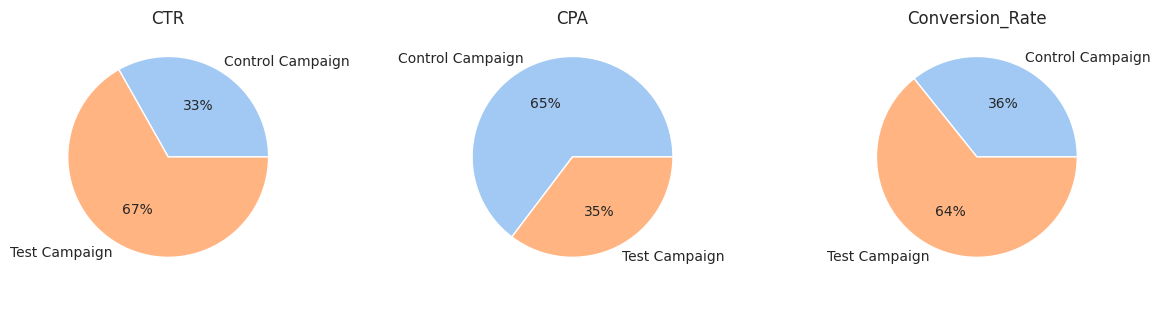

In [ ]:
colors = sns.color_palette('pastel')[0:2]
labels = viz['Campaign_Name']
a = 1
plt.figure(figsize=[20,15])
df_n = viz.drop(['Campaign_Name','Activity'], axis=1)
for i in df_n.iloc[:,:].columns:
    plt.subplot(4,4,a)
    a+=1
    ax = plt.pie(viz[i], labels=labels, colors=colors, autopct='%.0f%%')
    plt.title(i)
    plt.xlabel(' ')
plt.show()

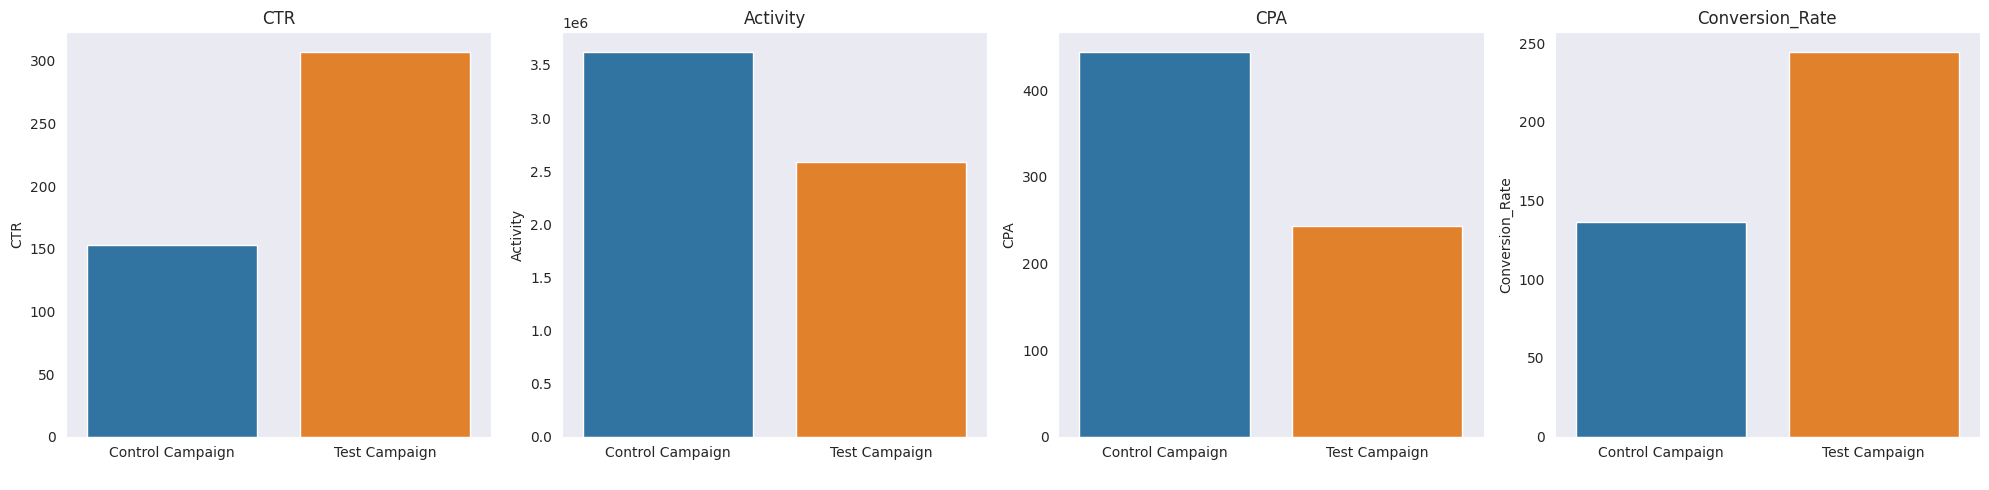

In [ ]:
a = 1
plt.figure(figsize=[20,5])
df_n = viz.loc[:,['CTR','Activity','CPA','Conversion_Rate','Campaign_Name']]
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(1,4,a)
    a+=1
    ax = sns.barplot(x='Campaign_Name', y=i, data=df_n)
    plt.title(i)
    plt.xlabel(' ')
plt.tight_layout()
plt.show()

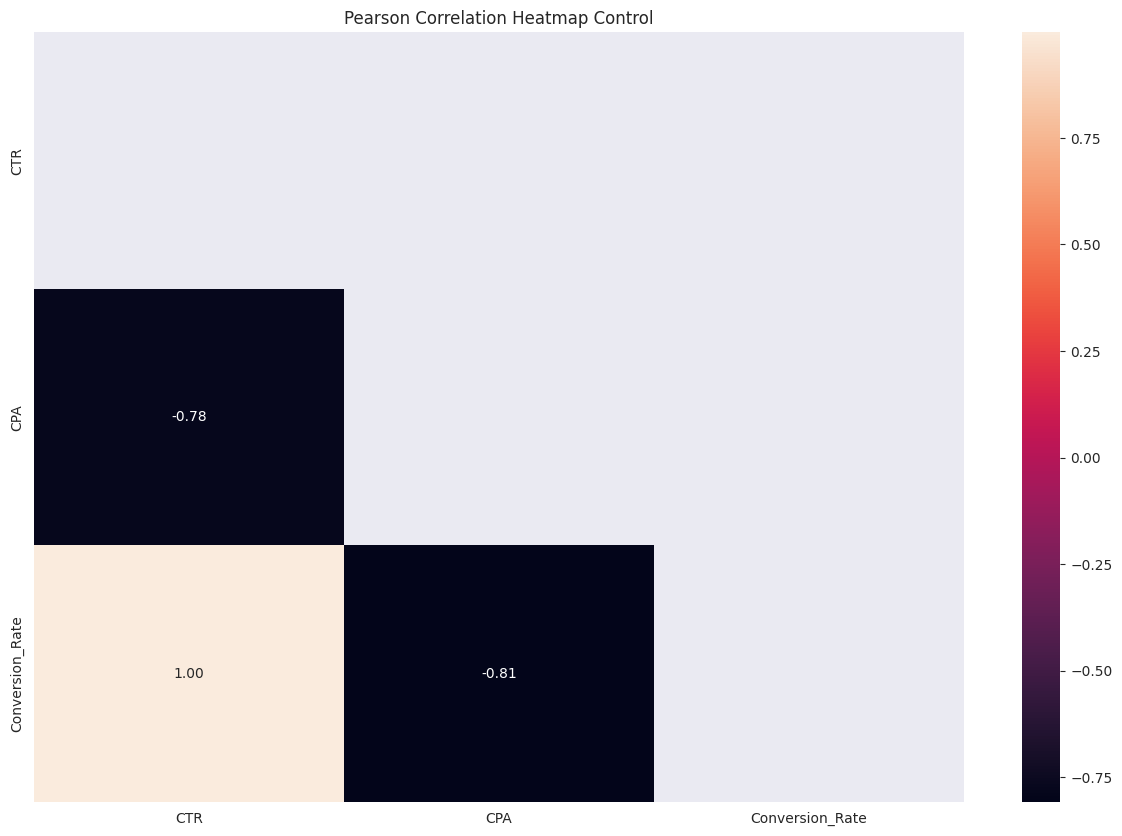

In [ ]:
df_corr = control_new[num].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap Control")
plt.show()

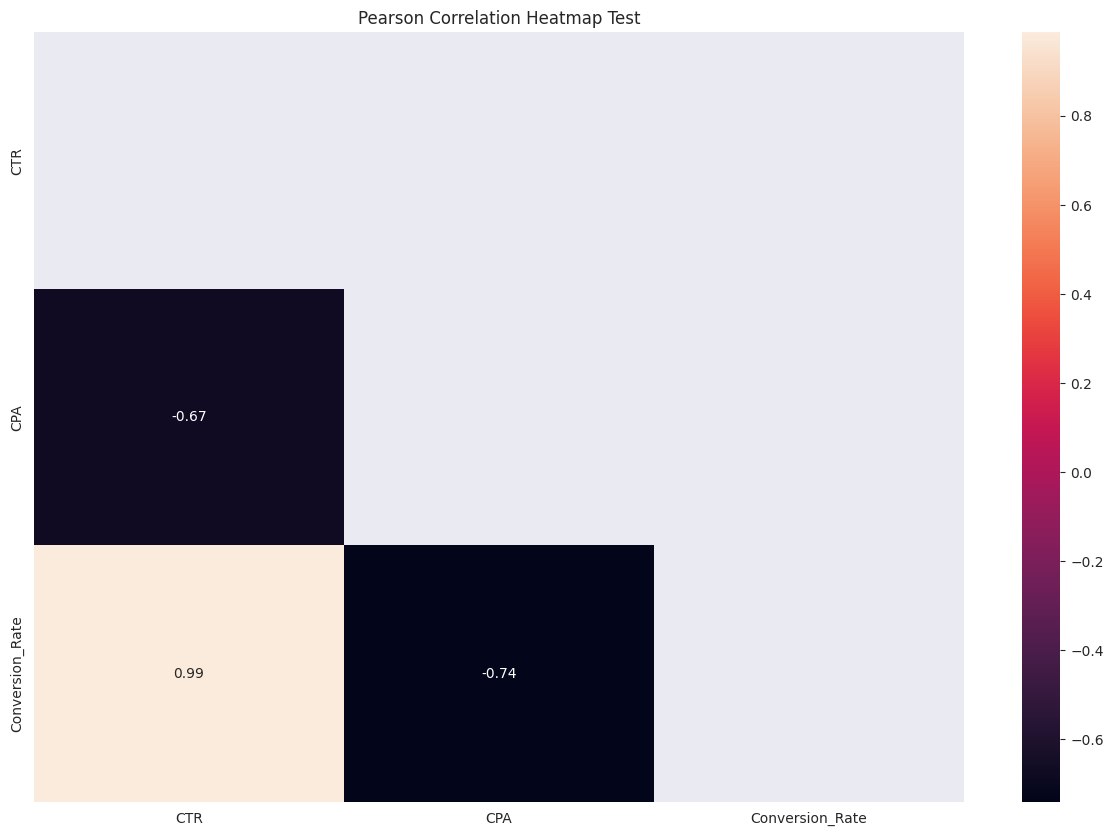

In [ ]:
df_corr = test_new[num].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap Test")
plt.show()

#### Insight


*   The visualization apparently has an impact on CTR, CPA and Conversion Rate.
*   The test campaign has the highest score on CTR and Conversion Rate, on the other hand the test campaign has the lowest CPA.
*   This indicated, the Test Campaign has high convertion rate so, the CPA is low.
*   I assume the customers didn't finish all the action **(the control campaign has higher add to cart than the test campaign)** on Control Campaign and this situation indicated the campaign was not really interesting after they click the campaign and the campaign was not really intersting since the control campaign has higher impersion and reach than the test campaign but, the control has lower CTR than the test campaign.  
*   A higher CTR can positively impact your CPA. When more people engage with your ad by clicking on it, you can potentially generate more conversions so it would reduct the CPA.
*   Since the Control Campaign has higher Activity than Test Campaign, so the Control Campaign has higher engagement than Test Campaign.
*   Seems like the Control Campaign focus on awareness (before entering the website).
*   Seems like the Test Campaign focus on after entiring the website, so it's higher conversion rate than The Control Campaign.





















# Mann Whitney U Test

In [ ]:
control_new_1 = control_new.copy()
test_new_1 = test_new.copy()

In [ ]:
control_new_1 = control_new.drop(['Campaign_Name','Date'], axis=1)
test_new_1 = test_new.drop(['Campaign_Name','Date'], axis=1)

In [ ]:
for i in control_new_1.columns :
  result = mannwhitneyu(control_new_1[i], test_new_1[i])
  print(result,i)

MannwhitneyuResult(statistic=199.0, pvalue=0.00021264638274527632) CTR
MannwhitneyuResult(statistic=608.0, pvalue=0.01988307641391072) CPA
MannwhitneyuResult(statistic=197.0, pvalue=0.00018916193602108462) Conversion_Rate


##### Results
The p-value of CTR, CPA and Conversion rate are < 0.05 % (reject H0, accept H1)

# Conlusion


* There is statistically significant difference between the control and test campaign on CTR, CPA, and Conversion Rate.
* Based on Mann Whitney U Test results, There is statistically significant difference between the control and test campaign.
* Based on the visualization results and Mann Whitney U Test the test campaign is the best campaign.









# Recommendation



*   Need to know the customers type whether the customer is the same or different in the following research.
*   Make sure the target customers are fit with the research.
*   It would be better if we do the AB Testing for only a feature impact.
*   The Company could combine test campaign with the control campaign to generate the awareness (before entering website) and after click action (after entering website).
*   To generate after click the campaign, the company could use test campaign.
*   Te generate the awareness (reach, impression, etc) the company could use the control campaign.






